In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math
%matplotlib inline

In [2]:
# load the dataset
# x_train, y_train = load_data()
data = np.loadtxt("ex1data1.txt", delimiter=',')
x_train = data[:,0]
y_train = data[:,1]

In [3]:
print("type of train:",type(x_train))
print("the first 5 elements: \n",x_train[:5])

type of train: <class 'numpy.ndarray'>
the first 5 elements: 
 [6.1101 5.5277 8.5186 7.0032 5.8598]


In [4]:
print("type of y_train:",type(y_train))
print("the first 5 elements : \n",y_train[:5])

type of y_train: <class 'numpy.ndarray'>
the first 5 elements : 
 [17.592   9.1302 13.662  11.854   6.8233]


In [5]:
print("shape of x_train:",x_train.shape)
print("shape of y_train:",y_train.shape)
print("number of training examples:",x_train.shape[0])

shape of x_train: (97,)
shape of y_train: (97,)
number of training examples: 97


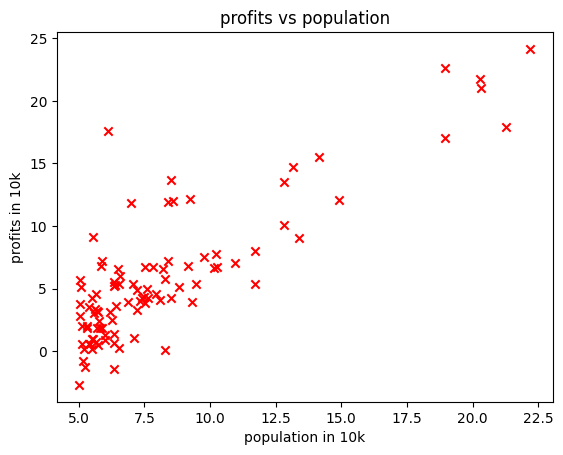

In [6]:
plt.scatter(x_train,y_train,marker='x',c='r')
plt.title("profits vs population")
plt.xlabel("population in 10k")
plt.ylabel("profits in 10k")
plt.show()

cost function:

In [21]:
def compute_cost(x,y,w,b):
    m = x.shape[0]
    total_cost = 0
    for i in range(m):
        fwb = w*x[i]+b
        total_cost += (fwb-y[i])**2
    total_cost = total_cost/(2*m)
    return total_cost

In [22]:
initial_w = 2
initial_b = 1

cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(type(cost))
print(f'Cost at initial w: {cost:.3f}')

# Public tests
from public_tests import *
compute_cost_test(compute_cost)

<class 'numpy.float64'>
Cost at initial w: 75.203
All tests passed!


Gradient descent:

In [25]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray): Shape (m,) Input to the model (Population of cities) 
      y (ndarray): Shape (m,) Label (Actual profits for the cities)
      w, b (scalar): Parameters of the model  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]
    
    # You need to return the following variables correctly
    dj_dw = 0
    dj_db = 0
    
    ### START CODE HERE ###
    for i in range(m):
        fwb = w*x[i]+b
        dj_dw += (fwb-y[i])*x[i]
        dj_db += (fwb-y[i])
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    ### END CODE HERE ### 
        
    return dj_dw, dj_db

In [26]:
# Compute and display gradient with w initialized to zeroes
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

compute_gradient_test(compute_gradient)

Gradient at initial w, b (zeros): -65.32884974555672 -5.83913505154639
Using X with shape (4, 1)
All tests passed!


In [28]:
# Compute and display cost and gradient with non-zero w
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -47.41610118114435 -4.007175051546391


Learning parameters - batch gradient descent:

In [29]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    m = x.shape[0]
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x,y,w,b)

        w = w - alpha*dj_dw
        b = b - alpha*dj_db
        
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history #return w and J,w history for graphing


In [36]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     6.74   
Iteration  150: Cost     5.31   
Iteration  300: Cost     4.96   
Iteration  450: Cost     4.76   
Iteration  600: Cost     4.64   
Iteration  750: Cost     4.57   
Iteration  900: Cost     4.53   
Iteration 1050: Cost     4.51   
Iteration 1200: Cost     4.50   
Iteration 1350: Cost     4.49   
w,b found by gradient descent: 1.166362350335582 -3.63029143940436


linear fit : 

In [37]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w*x_train[i]+b

Text(0.5, 0, 'Population of City in 10,000s')

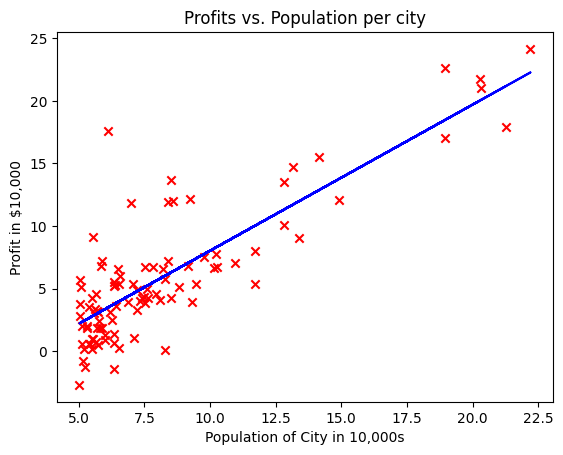

In [38]:
# Plot the linear fit
plt.plot(x_train, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')

In [39]:
predict1 = 3.5 * w + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))

predict2 = 7.0 * w + b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2*10000))

For population = 35,000, we predict a profit of $4519.77
For population = 70,000, we predict a profit of $45342.45
